In [2]:
import sys
import pathlib
utils_path = pathlib.Path().absolute().parent
sys.path.append(utils_path.__str__())
import utils
import plotly.io as pio
import utils.layout as lay
from utils.config import apikey
from eodhd import APIClient
api = APIClient(apikey)

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA


In [6]:
def ACF(variable):        
    sm.graphics.tsa.plot_acf(variable, lags=20)
    plt.title("ACF")
    plt.show()   

def PACF(variable):        
    sm.graphics.tsa.plot_pacf(variable, lags=20)
    plt.title("PACF")
    plt.show() 
    
def Ljung(variable):
    result_df = acorr_ljungbox(variable, lags=list(range(1, 21)), return_df=True)
    print(result_df)

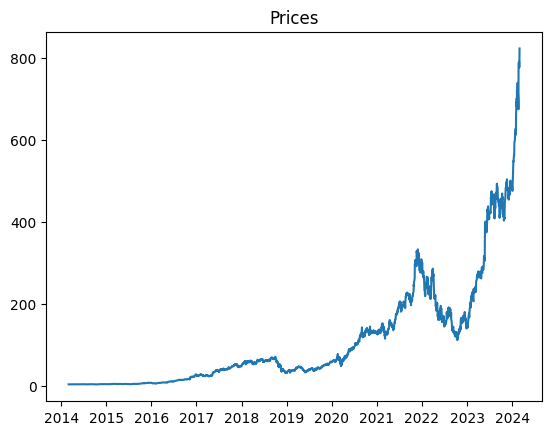

In [7]:
start = "2014-03-01"

prices = api.get_historical_data("NVDA", interval="d", iso8601_start=start,
                              iso8601_end="2024-03-01")["adjusted_close"].astype(float)
prices.name = "NVDA"

plt.plot(prices)
plt.title('Prices')
plt.show()

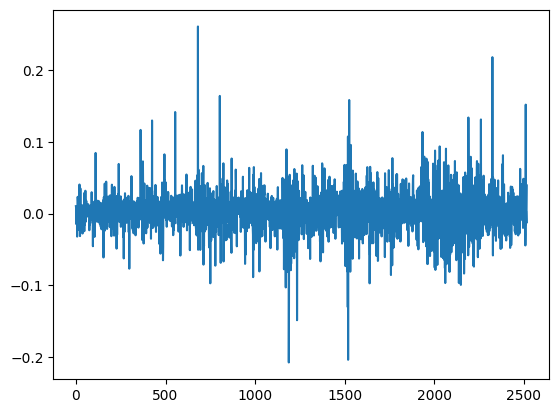

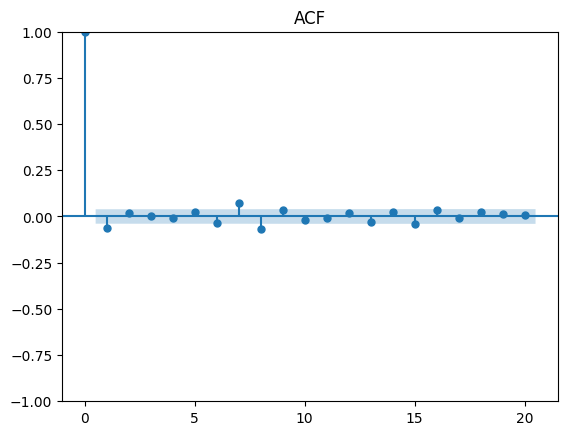

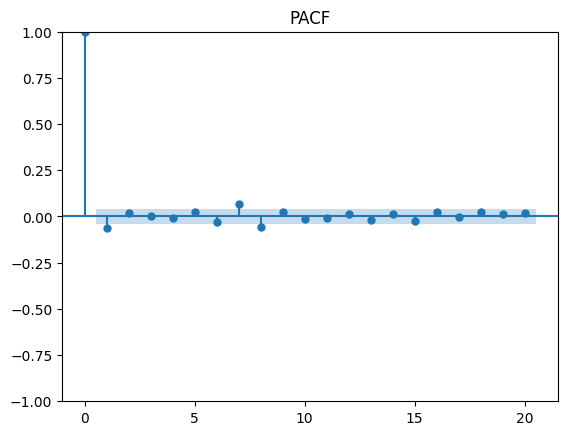

       lb_stat  lb_pvalue
1  10.24854355 0.00136793
2  11.35780800 0.00341730
3  11.36607710 0.00990244
4  11.44349845 0.02200687
5  13.13978308 0.02210348
6  16.12173721 0.01311526
7  29.50900200 0.00011681
8  41.08930334 0.00000201
9  43.91768984 0.00000146
10 44.62478838 0.00000254
11 44.71164824 0.00000545
12 45.76519261 0.00000762
13 47.69297500 0.00000738
14 49.16502898 0.00000842
15 52.89380433 0.00000402
16 56.46691528 0.00000204
17 56.71362124 0.00000362
18 58.10983053 0.00000412
19 58.64807851 0.00000632
20 58.79427258 0.00001093


In [8]:
returns = np.log(prices[1:].values) - np.log(prices[0:-1].values)
plt.plot(returns)
plt.show()

ACF(returns)
PACF(returns)
Ljung(returns)

In [9]:
#Model an ARMA(1,1) model on returns
model = ARIMA(returns, order=(1,0,1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2517
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5327.763
Date:                Sat, 09 Mar 2024   AIC                         -10647.526
Time:                        17:30:15   BIC                         -10624.202
Sample:                             0   HQIC                        -10639.061
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      3.655      0.000       0.001       0.003
ar.L1         -0.2955      0.230     -1.287      0.198      -0.746       0.154
ma.L1          0.2327      0.235      0.989      0.3

In [10]:
#Model an AR(1) model on returns
model = ARIMA(returns, order=(1,0,0))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2517
Model:                 ARIMA(1, 0, 0)   Log Likelihood                5327.488
Date:                Sat, 09 Mar 2024   AIC                         -10648.976
Time:                        17:30:45   BIC                         -10631.483
Sample:                             0   HQIC                        -10642.627
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      3.780      0.000       0.001       0.003
ar.L1         -0.0638      0.013     -4.769      0.000      -0.090      -0.038
sigma2         0.0008   1.09e-05     77.634      0.0

In [11]:
#Model an MA(1) model on returns
model = ARIMA(returns, order=(0,0,1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2517
Model:                 ARIMA(0, 0, 1)   Log Likelihood                5327.296
Date:                Sat, 09 Mar 2024   AIC                         -10648.593
Time:                        17:31:14   BIC                         -10631.100
Sample:                             0   HQIC                        -10642.244
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      3.779      0.000       0.001       0.003
ma.L1         -0.0628      0.014     -4.568      0.000      -0.090      -0.036
sigma2         0.0008    1.1e-05     77.548      0.0